# Load Libraries & Data

In [1]:
!wget https://www.spataru.at/students/course_files/week2/adult_rev2.csv

--2021-12-13 12:04:13--  https://www.spataru.at/students/course_files/week2/adult_rev2.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3595716 (3.4M) [text/csv]
Saving to: ‘adult_rev2.csv’

adult_rev2.csv      100%[===================>]   3.43M  4.16MB/s    in 0.8s    

2021-12-13 12:04:14 (4.16 MB/s) - ‘adult_rev2.csv’ saved [3595716/3595716]



In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

**Load the data in a variable named df**

Tip: pd.read_csv()




The file path is "adult_rev2.csv"

In [3]:
df = pd.read_csv("adult_rev2.csv")

**How many rows and columns does the data have?**

df.shape > (rows,columns)

In [4]:
df.shape

(32761, 15)

**Show the first 5 rows of the data**

In [5]:
df.head()

,social_number,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,717703,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,931778,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,176143,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,953541,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,523037,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Cleaning

**Drop the duplicates in the data**

Note: replace the current df (dataframe) with the clean df


In [6]:
df.size

491415

In [7]:
df.shape

(32761, 15)

In [8]:
df = df.drop_duplicates()

**How many rows are left?**

In [9]:
print(df.shape)

(32589, 15)


**How many values are there in missing in the column workclass?**

In [10]:
df.workclass.isna().sum()

1837

**Drop all missing values**

Note: replace the current df (dataframe) with the clean df

In [11]:
df = df.dropna()

**How many rows are left?**

In [12]:
df.shape

(30189, 15)

**Is the income column inconsistent? Then fix it**  

In [13]:
df.income.value_counts()

<=50K            21521
>50K              5871
less than 50k     1144
more than 50k      923
over 50k           730
Name: income, dtype: int64

In [14]:
less_than = df[df.income == "less than 50k"].index

In [15]:
less_than

Int64Index([    5,    22,   125,   207,   247,   322,   335,   341,   992,
             1041,
            ...
            32403, 32406, 32411, 32429, 32471, 32473, 32595, 32616, 32624,
            32748],
           dtype='int64', length=1144)

In [16]:
df.loc[less_than, "income"] = "<=50K"

In [17]:
df.income.value_counts()

<=50K            22665
>50K              5871
more than 50k      923
over 50k           730
Name: income, dtype: int64

In [18]:
more_than = df[df.income.isin(["more than 50k", "over 50k"])].index

In [19]:
df.loc[more_than, "income"] = ">50K"

In [20]:
df.income.value_counts()

<=50K    22665
>50K      7524
Name: income, dtype: int64

**Drop social number. How many column are there left?** 

Note: Replace the old dataframe with the new clean one

In [21]:
df = df.drop("social_number",axis=1)

In [22]:
df.shape

(30189, 14)

# Exploratory Data Analysis

## Univariate

** Describe Age**

In [28]:
df.age.describe()

count    30189.000000
mean        38.441949
std         13.135234
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

**Determine the mean of the column "hours.per.week"**

In [31]:
df.hours_per_week.mean()

40.93143197853523

In [32]:
df.hours_per_week.median()

40.0

In [33]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

**What is the diference between mean and median on capital gain?**

In [35]:
df.capital_gain.mean() - df.capital_gain.median()

1092.778859849614

**How many unique workclasses?** 

In [36]:
df.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

**How many different types of education are there?** 

In [37]:
df.education.nunique()

16

In [39]:
len(df.education.unique())

16

In [40]:
df.education.value_counts()

HS-grad         9846
Some-college    6685
Bachelors       5052
Masters         1627
Assoc-voc       1307
11th            1049
Assoc-acdm      1009
10th             820
7th-8th          557
Prof-school      542
9th              456
12th             378
Doctorate        376
5th-6th          288
1st-4th          151
Preschool         46
Name: education, dtype: int64

**How many people are divorced?**

In [42]:
df.marital_status.value_counts()

Married-civ-spouse       14085
Never-married             9730
Divorced                  4215
Separated                  940
Widowed                    827
Married-spouse-absent      371
Married-AF-spouse           21
Name: marital_status, dtype: int64

In [45]:
df[df.marital_status == "Divorced"].shape[0]

4215

**Histogram Age** 

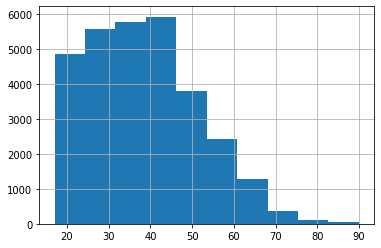

In [47]:
df.age.hist()

In [48]:
px.histogram(data_frame=df,x="age")

**Create a countplot for martial status** 

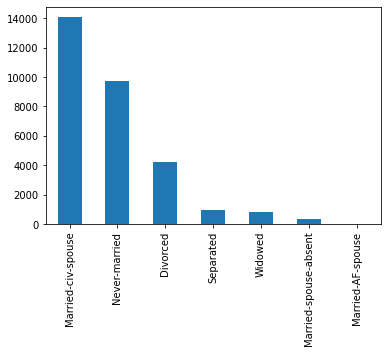

In [51]:
df.marital_status.value_counts().plot(kind="bar")

In [52]:
px.histogram(df,x="marital_status")

## Bivariate Analysis

**How many Salesperson make a capital gain of over 80000?**

In [54]:
df[df.capital_gain > 80000].occupation.value_counts()

Prof-specialty       65
Exec-managerial      38
Sales                24
Craft-repair          8
Adm-clerical          6
Other-service         2
Tech-support          1
Machine-op-inspct     1
Handlers-cleaners     1
Protective-serv       1
Transport-moving      1
Name: occupation, dtype: int64

In [56]:
df[(df.capital_gain > 80000) & (df.occupation == "Sales")].shape[0]

24

**How many rows have a capital loss and capital gain bigger than 0?** 

In [58]:
df[(df.capital_gain > 0) & (df.capital_loss > 0)].shape[0]

0

**Create a feature which combines capital_loss and capital_gain**

In [63]:
df["capital"] = df.capital_gain - df.capital_loss

In [65]:
df.capital.mean()

1004.4224055119414

**What is the mean capital?**

**What is the median capital?**

**How many people have a capital of 0?** 

**What is the percentage of people which make a capital gain of over 10000?**

**What is the occupation of the biggest capital loss?** Q

Tip: Use min() or max()

**What is the ratio between <=50K income and >50K?**

**How many people with a income >50K have a 
capital loss?**

**How manydivorced people with a income >50K have a capital gain?**

**Do a scatter plot between age and capital**

**This look unreadable. Calculate the average capital by age** 

**Calculate the correlation on the whole dataframe**

**Do men make more money than women?**